In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
pd.set_option('display.max_rows', 8100000)

pd.set_option('display.max_columns', 8100000)


In [2]:
digit_train = pd.read_csv("train.csv")
digit_test  =pd.read_csv("test.csv")

In [3]:
#information about the data set 
print(digit_train.shape)
print("\n")
print(digit_train.info())
print("\n")
print(digit_train.describe())
print("\n")
print(digit_train.columns)
print("\n")

(42000, 785)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8   pixel9  pixel10  pixel11      pixel12  \
count  42000.0  42000.0  42000.0  42000.0  42000.0

In [4]:
digit_train.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [5]:
print(digit_train.shape)

(42000, 785)


## EDA Starts

In [6]:
digit_mean = digit_train.groupby('label').mean().reset_index()
digit_mean

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1      1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2      2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3      3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4      4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5      5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6      6     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7      7     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8      8     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9      9     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel8  pixel9  pixel10  pixel11   pixel12   pixel13   pixel14   pixel15  \
0     0.0     0.0      0.0      0.0  0.000000  0.000000  0.000000  0.000000   
1     0.0     0.0      0.0      0.0  0.000000  0.000000  0.000000  0.000000   
2     0.0     0.0      0.0      0.0  0.002394  0.051712  0.051712  0.002155   
3     0.0     0.0      0.0      0.0  0.000000  0.000000  0.000000  0.000000   
4     0.0     0.0      0.0      0.0  0.000000  0.000000  0.000000  0.000000   
5     0.0     0.0      0.0      0.0  0.000000  0.000000  0.000000  0.000000   
6     0.0     0.0      0.0      0.0  0.028040  0.061397  0.000000  0.000000   
7     0.0     0.0      0.0      0.0  0.000000  0.000000  0.000000  0.000000   
8     0.0     0.0      0.0      0.0  0.000000  0.000000  0.000000  0.000000   
9     0.0     0.0      0.0      0.0  0.000000  0.000000  0.000000  0.000000   

   pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
6      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
9      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
6      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
9      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

    pixel32   pixel33   pixel34   pixel35   pixel36   pixel37   pixel38  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.003831  0.066794  0.079004  0.082835   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6  0.003868  0.013295  0.107082  0.272903  0.449359  0.594392  1.231810   


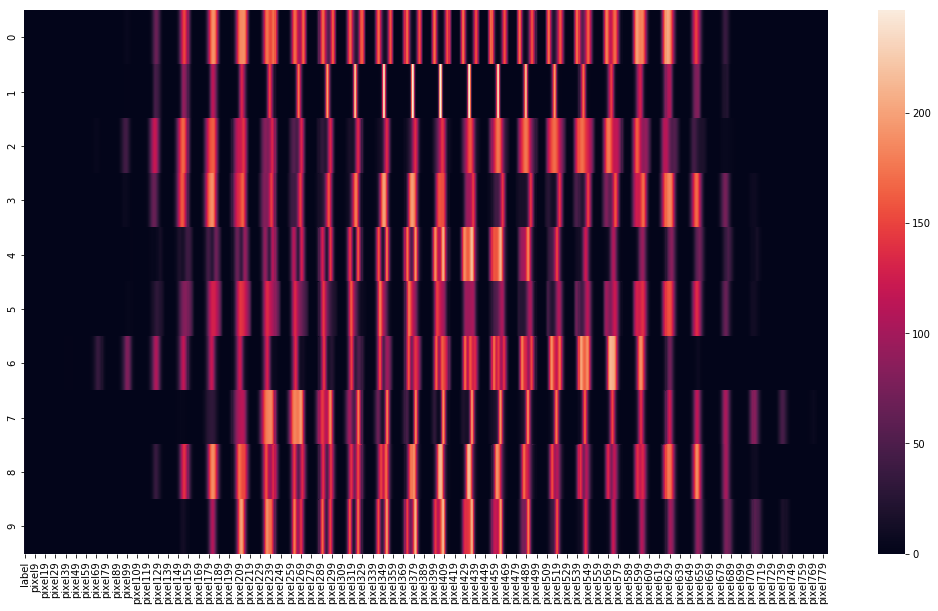

In [7]:
plt.figure(figsize=(18, 10))
sns.heatmap(digit_mean)

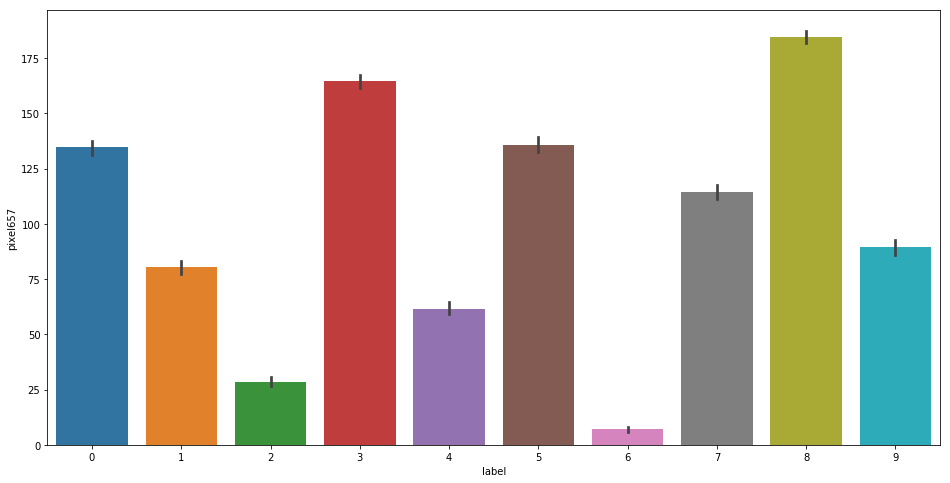

In [8]:
plt.figure(figsize=(16, 8))
sns.barplot(x='label', y='pixel657', 
            data=digit_train, 
            )

In [9]:
# 19% of data picked from train set 
digit_mod = digit_train.sample(frac=0.19)
X=digit_mod.drop("label",axis=1)
Y=digit_mod["label"]
#Scaling X
X=scale(X)

In [10]:

digit_mod.shape


(7980, 785)

In [11]:
#Since the data is huge we will be using 25% of it to build our model . 
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7,test_size = 0.3, random_state = 101)

In [12]:
x_train.shape

(5586, 784)

## Model Building Starts

In [13]:
model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
# predict 
y_pred = model_linear.predict(x_test)

In [15]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9135338345864662 

[[247   0   0   0   0   5   1   1   0   0]
 [  0 235   1   1   0   1   0   1   1   0]
 [  4   4 206   5   3   1   4   2   2   0]
 [  2   4  13 221   1   6   1   0   7   3]
 [  0   1   7   0 211   0   2   2   1   4]
 [  2   1   2  13   2 183   1   0   3   1]
 [  1   0   1   0   5   5 227   0   1   0]
 [  1   4   3   2   0   0   0 247   0   5]
 [  1   4   2   5   1  14   4   3 205   2]
 [  3   1   0   3  11   1   0   7   1 205]]


In [ ]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(x_train, y_train)
y_pred = model_rbf.predict(x_test)
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-1,1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)   
        

# fit the model
model_cv.fit(x_train, y_train)    

y_pred = model_cv.predict(x_test)

print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
best_C=model_cv.best_params_['C']
best_G=model_cv.best_params_['gamma']
print (best_C)
print (best_G)

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1.5])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1.5])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1.5])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

In [ ]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")


## The Data set is formed as per the instructions in kaggle 

In [ ]:
digit_test.reset_index()
digit_test['ID'] = range(0, 0+len(digit_test))
X=digit_test.drop("ID",axis=1)
#Scaling X
X=scale(X)

In [ ]:
test_pred=model.predict(X)

In [ ]:
test_pred

In [ ]:
answer_set = pd.DataFrame({'id': digit_test['ID'], 'Digit_predicted': test_pred})
answer_set.head()